In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load your original file
df = pd.read_csv("C:\\Users\\Admin\\diabetes_cleaned.csv")

# Step 2: Replace 0s in specific columns with median (based on your earlier EDA)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Step 3: Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Stratified split + SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


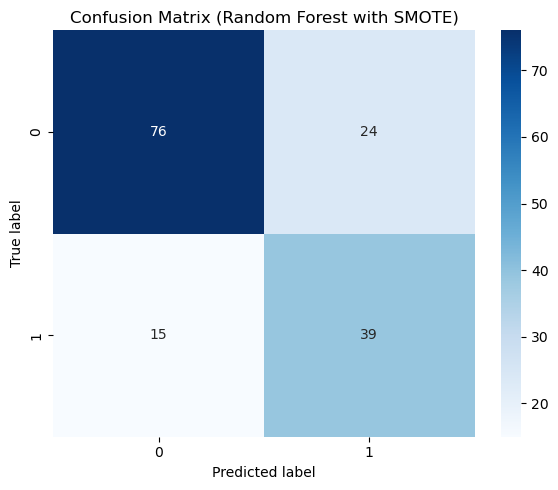

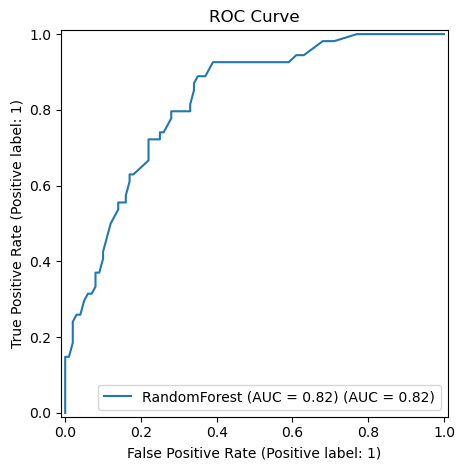

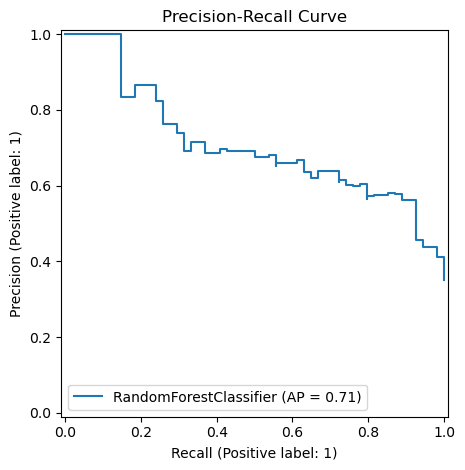

('              precision    recall  f1-score   support\n\n           0       0.84      0.76      0.80       100\n           1       0.62      0.72      0.67        54\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n',
 0.823888888888889)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess dataset (simulate your cleaned dataset)
from sklearn.datasets import load_diabetes
data = pd.read_csv("C:\\Users\\Admin\\diabetes_cleaned.csv")  # Assuming this cleaned file exists

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest with SMOTE)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test, name=f"RandomForest (AUC = {roc_auc:.2f})")
plt.title("ROC Curve")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()

(class_report, roc_auc)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8164\562095367.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette="Blues_d")


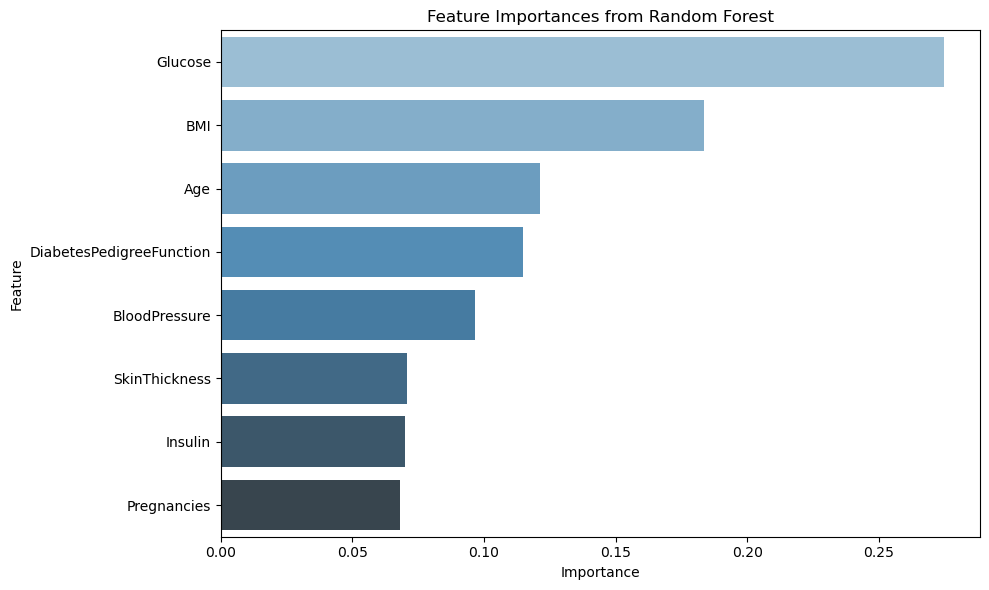

In [18]:
# Feature importance plot
importances = rf.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette="Blues_d")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()
 

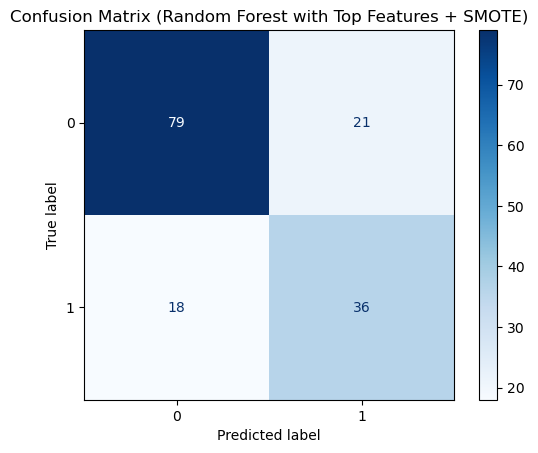

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.63      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



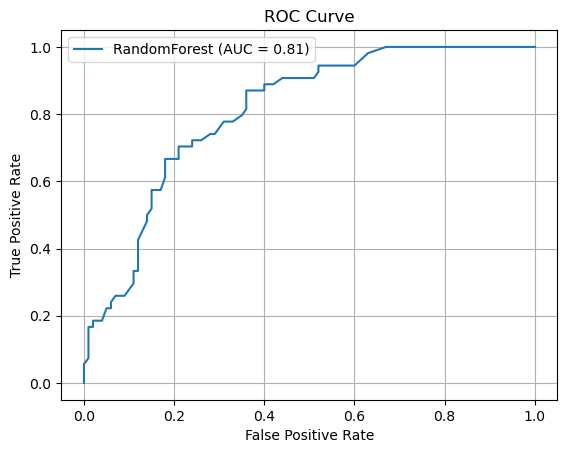

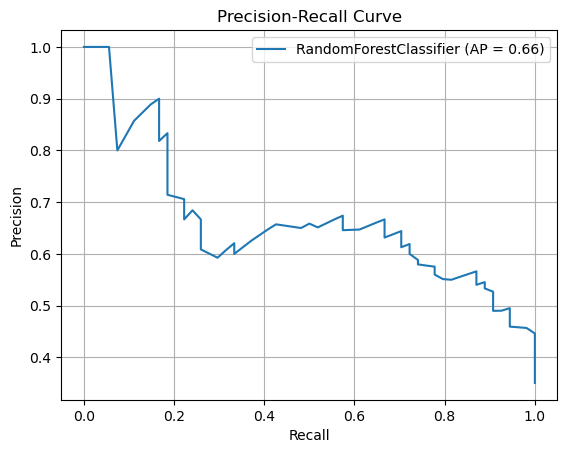

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Select top 4 features
top_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
X_selected = df[top_features]
y = df['Outcome']

# STEP 2: Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 3: Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# STEP 5: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# STEP 6: Predict
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# STEP 7: Evaluate

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest with Top Features + SMOTE)")
plt.show()

## Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.plot(recall, precision, label=f'RandomForestClassifier (AP = {ap:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("CV Scores:", scores)
print("Mean CV Score:", scores.mean())


CV Scores: [0.75625 0.74375 0.79375 0.8875  0.86875]
Mean CV Score: 0.8100000000000002


✅ Best Parameters Found: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best Cross-Validation Score (Accuracy): 0.82125
✅ Test Accuracy: 0.7597402597402597

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



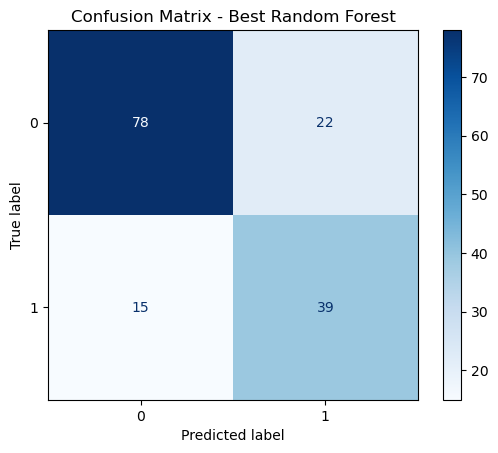

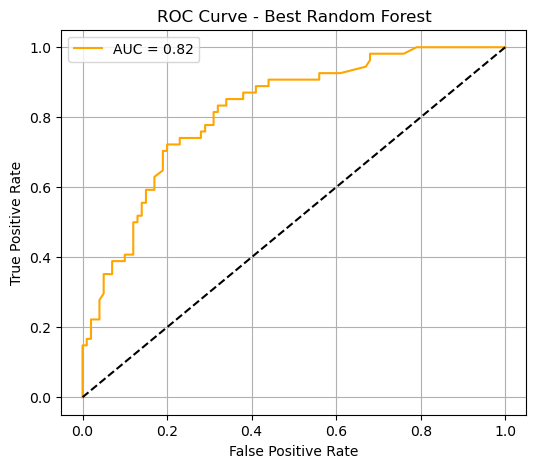

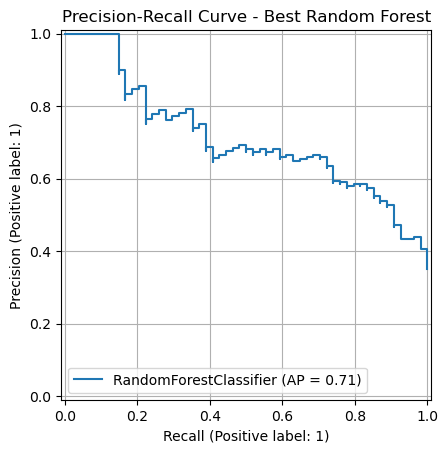

In [65]:
# STEP 0: Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Split Data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# STEP 2: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import joblib
joblib.dump(scaler, 'scaler.pkl')


# Convert back to DataFrames (to avoid feature name mismatch warning)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# STEP 3: SMOTE on TRAINING SET ONLY
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled_df, y_train)

# STEP 4: GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train_bal, y_train_bal)

print("✅ Best Parameters Found:", grid.best_params_)
print("✅ Best Cross-Validation Score (Accuracy):", grid.best_score_)

# STEP 5: Evaluation on Test Set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled_df)
y_proba = best_model.predict_proba(X_test_scaled_df)[:, 1]

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# STEP 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.show()

# STEP 7: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Best Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# STEP 8: Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(best_model, X_test_scaled_df, y_test)
plt.title("Precision-Recall Curve - Best Random Forest")
plt.grid(True)
plt.show()


In [67]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'diabetes_model.pkl')
print("✅ Model saved as 'diabetes_model.pkl'")


✅ Model saved as 'diabetes_model.pkl'


In [69]:
# Load the model
model = joblib.load('diabetes_model.pkl')

# Use it to predict
predictions = model.predict(X_test_scaled)
print("✅ Predictions made using loaded model")


✅ Predictions made using loaded model


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
